In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data.csv',encoding = 'gb18030')

In [3]:
data.info() 
#90列   4753行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null float64
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobilit

In [4]:
# 查看每行中缺失了多少个值，有的缺失了超过40个 这时考虑是否这些样本有用要删除掉。暂时先不考虑
line = []
for i in data.index:
    line.append(data.iloc[i].isnull().sum())
line_df =  pd.DataFrame(line, columns=['missing values'])
line_df.sort_values('missing values', ascending=False)[:200]
#line_df.loc[line_df['missing values']>40]

,missing values
2762,46
1458,45
3715,44
1906,44
1997,44
531,44
3531,44
2733,44
2246,44
86,44


In [5]:
stats = []
#计算每一列的  列名  列包含多少类  列空的比例  列最多的元素所占比例  列类型
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
#   将缺失值 按照降序排列 
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,student_feature,2,63.062684,63.062684,float64
33,cross_consume_count_last_1_month,19,8.960875,64.535128,float64
58,latest_six_month_apply,65,6.394615,6.394615,float64
56,latest_one_month_apply,36,6.394615,17.522087,float64
55,latest_query_time,207,6.394615,8.897770,object
54,query_sum_count,74,6.394615,6.394615,float64
53,query_cash_count,17,6.394615,15.649979,float64
52,query_finance_count,25,6.394615,11.190576,float64
51,query_org_count,46,6.394615,6.394615,float64
50,apply_credibility,41,6.394615,11.022297,float64


In [6]:
#可以考虑把无关的列删除、区分度不大的列
stats_df.sort_values('Unique_values', ascending=False)
#删除 source bank_card_no jewelry_consume_count_last_6_month  is_high_user、railway_consume_count_last_12_month 区分度不大 删除掉
# custid  trade_no  bank_card_no id_name
data = data.drop(['source' ,'jewelry_consume_count_last_6_month' , 'is_high_user','railway_consume_count_last_12_month','custid','trade_no','bank_card_no','id_name'],axis= 1)

In [7]:
#处理缺失值  思路按照缺失比例进行填充删除
#  这里如果一个行的缺失值过多需要保留该样本吗
  
#将缺失值的列显示出来    
#stats_df.sort_values('Percentage of missing values', ascending=False).Feature.values
    
#Student feature中 NA代表不是学生用0代替
data.student_feature = data.student_feature.fillna(0)


#上个月交叉消费统计  用众数填充 众数为0
#data.cross_consume_count_last_1_month = data.cross_consume_count_last_1_month.fillna(data.cross_consume_count_last_1_month.mode()[0])



#latest_six_month_apply  最近6个月申请
# latest_three_month_apply最近3个月申请
#latest_query_day 最近查询天数
#apply_score 申请分数
#apply_credibility 申请可信度 
#query_org_count   查询org统计
missing = ['cross_consume_count_last_1_month',
       'apply_score', 'query_finance_count', 'query_cash_count',
       'query_sum_count', 'latest_one_month_apply',
       'latest_three_month_apply', 'latest_six_month_apply',
       'apply_credibility', 'query_org_count', 'latest_query_day',
       'loans_product_count', 'loans_org_count_current',
       'consfin_avg_limit', 'consfin_max_limit', 'consfin_product_count',
       'consfin_org_count_current', 'consfin_credibility',
       'consfin_credit_limit', 'loans_score',
       'loans_credibility_behavior', 'loans_count', 'loans_settle_count',
       'loans_avg_limit', 'loans_overdue_count',
       'loans_org_count_behavior', 'consfin_org_count_behavior',
       'loans_cash_count', 'latest_one_month_loan',
       'latest_three_month_loan', 'latest_six_month_loan',
       'loans_max_limit', 'history_fail_fee', 'latest_one_month_suc',
       'latest_one_month_fail', 'loans_long_time',
       'loans_credit_limit', 'loans_credibility_limit', 'history_suc_fee',
       'loans_latest_day', 'avg_price_top_last_12_valid_month',
       'consume_mini_time_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_12_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_days_interval_filter', 'max_consume_count_later_6_month',
       'consume_top_time_last_6_month', 'consume_top_time_last_1_month',
       'trans_top_time_last_6_month', 'trans_top_time_last_1_month',
       'trans_amount_increase_rate_lately',
       'number_of_trans_from_2011', 'regional_mobility',
       'trans_days_interval', 'low_volume_percent', 'rank_trad_1_month',
       'transd_mcc', 'trans_activity_day', 'trans_activity_month',
       'middle_volume_percent', 'historical_trans_day',
       'top_trans_count_last_1_month', 'avg_consume_less_12_valid_month',
       'trans_day_last_12_month', 'reg_preference_for_trad',
       'first_transaction_day']


time = ['loans_latest_time','latest_query_time','first_transaction_time']

for col in missing:
    data[col] = data[col].fillna(data[col].mode()[0])
    
#对于时间的填充，后期参考下大佬的操作吧
for col in time:
    data[col] = data[col].fillna(data[col].mode()[0])





([<matplotlib.patches.Wedge at 0x9286978>,
 [Text(-0.775501,0.780127,'due'), Text(0.846001,-0.851048,'overdue')],
 [Text(-0.423001,0.425524,'74.91%'), Text(0.493501,-0.496444,'25.09%')])

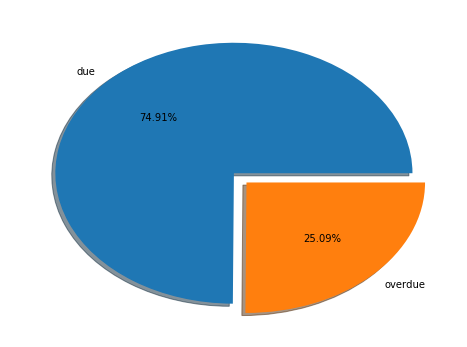

In [8]:
# 查看逾期与不逾期的比例
target_col = 'status'
labels = ['due','overdue']
due = data.loc[(data[target_col] == 0)].shape[0] #  (data[target_col] == 0).sum()
overdue = data.loc[(data[target_col] == 1)].shape[0]
x = [due,overdue] 

plt.figure(figsize=(8,6))
explode = [0, 0.1] # 0.1 凸出这部分，
#plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x,labels =labels,autopct='%1.2f%%',explode=explode,shadow=True)

In [9]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True,stratify = y) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动

In [10]:
#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size

(3327, 1427, 3327, 1427)